## Interpolation tests

Notebook to test the the interpolation function.

Version 0.1 (2025-04-28): initial conversion from Matlab.

## Setting parameters

In [1]:
# Define the tonnage
tonnage = "H_32t"  # Standard axle load (30 tons), alternatively "H_32t" for heavy axle load (32.5 tons)

# Define the rail profile
rail_profile = "MB5"  # MB5 or MB6

# The actual path to your Excel file
file_path = '../data/raw/raw_data_structured.csv'

## Reading input data

In [2]:
# Ensure the preprocessings module is accessible
import sys
sys.path.append('../')  # Adjust the path to the root directory containing 'preprocessings'

# Import the function to read the input data
from preprocessings.read_input_data import read_input_data

# Call the function to read the data
data_df = read_input_data(file_path)
data_df

,Profile,Load,Condition,Gauge,Month,Value
0,MB5,32.5,H-index,1440,1,0.5300
1,MB5,32.5,H-index,1445,1,0.5300
2,MB5,32.5,H-index,1450,1,0.5300
3,MB5,32.5,H-index,1455,1,0.5300
4,MB6,32.5,H-index,1450,1,0.5300
...,...,...,...,...,...,...
283,MB5,32.5,RCF-depth,1445,12,0.5234
284,MB5,32.5,RCF-depth,1450,12,0.9234
285,MB5,32.5,RCF-depth,1455,12,1.2440
286,MB6,32.5,RCF-depth,1450,12,0.8339


In [3]:
from rail_analysis.interpolation import interpolate_rail_data

if data_df is not None:
    grinding_freq_max = 12

    # Example calls to the interpolation function
    h_index_interp = interpolate_rail_data(data_df, grinding_freq_max, 'H-index')
    print("\nH-index Interpolation:")
    if not h_index_interp.empty:
        print(h_index_interp)
    else:
        print("No H-index data to interpolate.")

    wear_interp = interpolate_rail_data(data_df, grinding_freq_max, 'Wear')
    print("\nWear Interpolation:")
    if not wear_interp.empty:
        print(wear_interp)
    else:
        print("No Wear data to interpolate.")

    rcf_residual_interp = interpolate_rail_data(data_df, grinding_freq_max, 'RCF-residual')
    print("\nRCF-residual Interpolation")
    if not rcf_residual_interp.empty:
        print(rcf_residual_interp)
    else:
        print("No RCF-residual data to interpolate")

    rcf_depth_interp = interpolate_rail_data(data_df, grinding_freq_max, 'RCF-depth')
    print("\n RCF-depth interpolation")
    if not rcf_depth_interp.empty:
        print(rcf_depth_interp)
    else:
        print("No RCF-depth data to interpolate")
else:
    print("Failed to load data.")



H-index Interpolation:
   Profile Condition  Gauge  Month     Value
0      MB5   h-index   1440      1  0.014200
1      MB5   h-index   1440      2  0.054544
2      MB5   h-index   1440      3  0.117649
3      MB5   h-index   1440      4  0.200130
4      MB5   h-index   1440      5  0.298605
5      MB5   h-index   1440      6  0.409690
6      MB5   h-index   1440      7  0.530000
7      MB5   h-index   1440      8  0.730000
8      MB5   h-index   1440      9  0.880000
9      MB5   h-index   1440     10  0.900000
10     MB5   h-index   1440     11  0.940000
11     MB5   h-index   1440     12  1.010000
12     MB5   h-index   1445      1  0.015423
13     MB5   h-index   1445      2  0.059166
14     MB5   h-index   1445      3  0.127437
15     MB5   h-index   1445      4  0.216447
16     MB5   h-index   1445      5  0.322404
17     MB5   h-index   1445      6  0.441519
18     MB5   h-index   1445      7  0.570000
19     MB5   h-index   1445      8  0.780000
20     MB5   h-index   1445    

# Plots

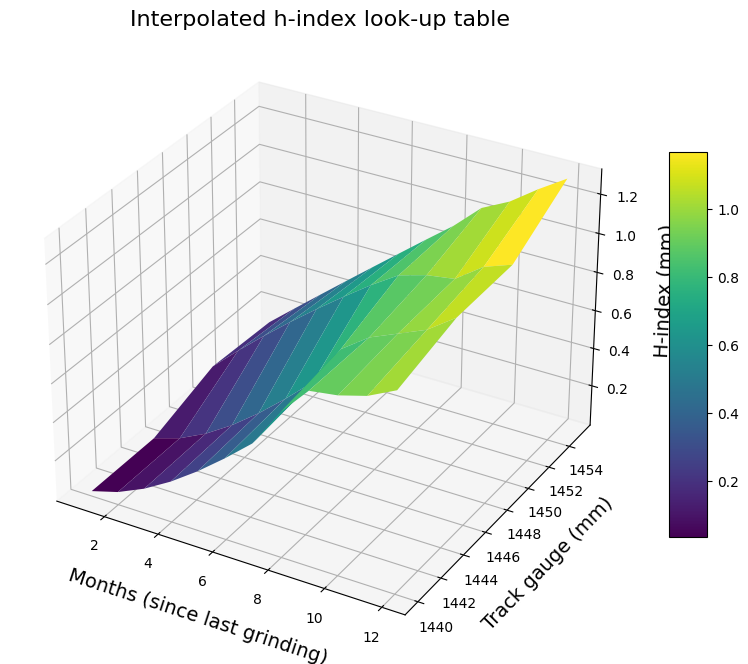

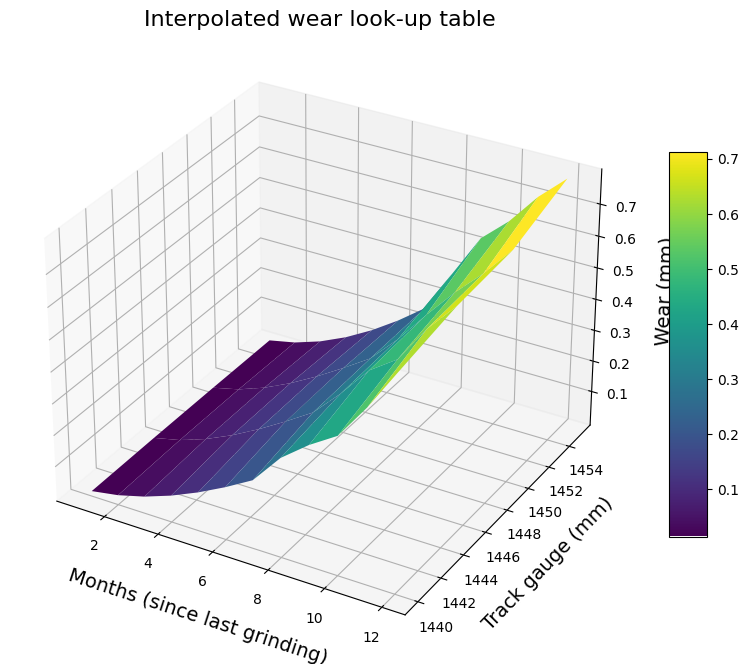

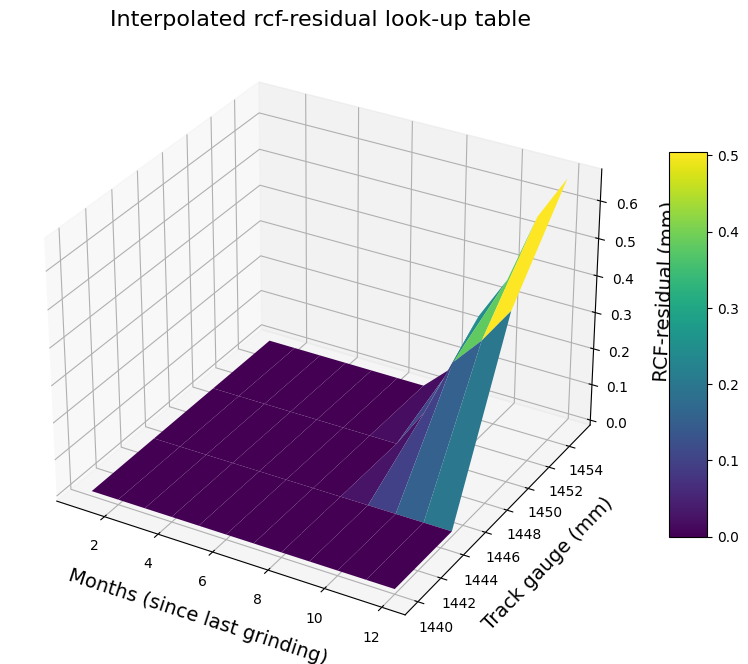

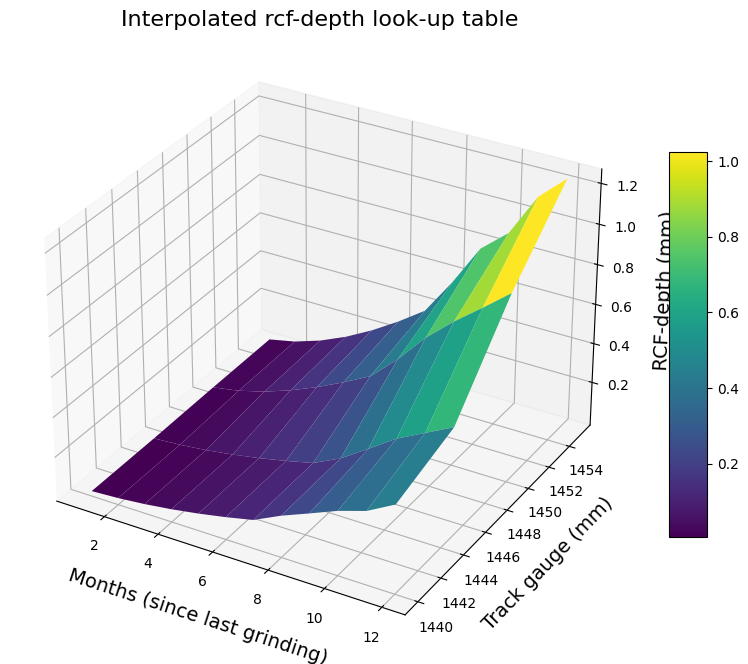

In [4]:
from rail_analysis.interpolation import plot_heatmap

# Example usage
plot_heatmap(h_index_interp, 'h-index', 'H-index')
plot_heatmap(wear_interp, 'wear', 'Wear')
plot_heatmap(rcf_residual_interp, 'rcf-residual', 'RCF-residual')
plot_heatmap(rcf_depth_interp, 'rcf-depth', 'RCF-depth')